# Showing differences between rows and columns distribution of the data set 

Authors:

     Sumeyye Su-(sumeyye.su@mavs.uta.edu) PhD student,Department of Mathematics in the University of Texas at Arlington
     Leili Shahriyari (lshahriyari@umass.edu, Advisor, Department of Mathematics and Statisics, University of Massachusetts Amherst

It has been observed that patients have similar  gene expression distributions, while the expression level of the each gene across the patient has different distribution(Shahriyari L.,2019)  

Here, we first found mean and standart deviation of each gene, and create a data frame with mean and sum of mean and standart deviation. Then we sorted the data frame based on the mean column. Then plot the distribution of the data frame. 

Also, we found the mean and standart deviation of gene expression of  each patient, and create a data frame with mean and sum of mean and standart deviation. Then we sorted the  data frame based on the mean column. Then plot the distribution of the data frame.  


In [1]:
#import some useful libraries
import os
import pandas as pd
import matplotlib.pylab as plt
#reading the data from the location of the data
notebook_path=os.path.dirname('Intro_plots_codes2.ipynb')
location_of_data=notebook_path+ "kidneydata/"
rna_file_name= "data_RNA_Seq_v2_expression_median.txt"
rna_file_path= location_of_data+ rna_file_name
rna_file_path


'kidneydata/data_RNA_Seq_v2_expression_median.txt'

In [2]:

rna =pd.read_csv(rna_file_path,  sep='\t')
#to make sure we do not process the name of genes we will convert them to string

rna[['Hugo_Symbol', 'Entrez_Gene_Id']] = rna[['Hugo_Symbol', 'Entrez_Gene_Id']].astype(str)
#drop Entrez_Gene_Id' column
rna=rna.drop(['Entrez_Gene_Id'],axis=1)
#set index Hugo_Symbol column
rna=rna.set_index([ 'Hugo_Symbol'])
rna.head()



,TCGA-3Z-A93Z-01,TCGA-6D-AA2E-01,TCGA-A3-3306-01,TCGA-A3-3307-01,TCGA-A3-3308-01,TCGA-A3-3311-01,TCGA-A3-3313-01,TCGA-A3-3316-01,TCGA-A3-3317-01,TCGA-A3-3319-01,...,TCGA-G6-A5PC-01,TCGA-G6-A8L6-01,TCGA-G6-A8L7-01,TCGA-G6-A8L8-01,TCGA-GK-A6C7-01,TCGA-MM-A563-01,TCGA-MM-A564-01,TCGA-MM-A84U-01,TCGA-MW-A4EC-01,TCGA-T7-A92I-01
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
LOC100130426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
UBE2Q2P3,2.9608,2.4501,3.2246,1.8578,6.4640,10.4052,6.5100,14.6871,16.5597,10.6939,...,1.2346,3.6669,0.0000,0.7315,1.8520,5.0603,17.1276,2.7042,12.5228,3.8379
UBE2Q2P3,11.4669,2.4069,8.1625,4.1055,2.7113,4.9358,13.1356,10.4830,12.2013,9.5446,...,1.7049,3.8725,8.1466,4.8240,4.5562,3.4824,2.9855,8.5634,8.3895,9.6231
LOC149767,75.7771,49.6384,70.2692,94.6101,89.7213,87.6572,62.6849,111.4014,69.5170,56.7040,...,38.0452,83.2008,39.2057,77.0403,58.0551,102.8342,95.3237,62.0845,104.6356,72.3542
TIMM23,563.9369,1313.5456,601.9669,546.3303,721.6424,700.0167,983.0508,423.1293,798.3038,705.4572,...,2193.6432,680.6032,1364.5621,580.5455,494.0724,649.2462,654.3055,1256.3380,581.0354,1088.8424


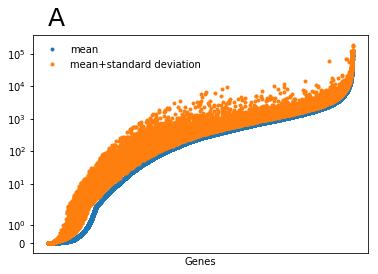

In [5]:
#finding the mean and standart deviation of each gene

# In Figure a we found mean and standart deviation of each gene, then sorted by mean values. 
mean = rna.mean(axis=1)
std = rna.std(axis =1)
#adding mean and std
mean_std = [(mean[i],std[i]+mean[i]) for i in range(len(mean))]
#sorted the data frame by mean column
sorted_mean_std = sorted(mean_std, key=lambda tup: tup[0])
#plot the gene graphs
plt.plot(sorted_mean_std,linestyle='',marker ='.')
plt.legend(['mean', 'mean+standard deviation'],
          loc='upper left', frameon=False)
#scale the y axes with  symmetrical logarithmic
plt.yscale('symlog')
plt.xlabel('Genes')

plt.xticks([])
plt.text(-4,700000,"A", fontsize=25)

plt.savefig('mean_genes.eps', format='eps',bbox_inches='tight', dpi=1000)
plt.show()

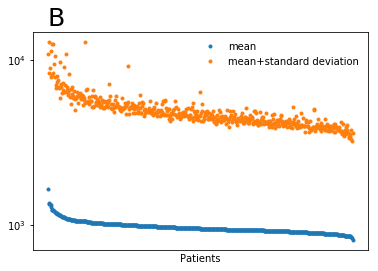

In [6]:
#transpoze the data frame for plot depend on patiens
rna_p=rna.T
# In figure b we found mean and standart deviation of gene expression level of patients,then sorted by mean values.
Mean_each_patient = rna_p.mean(axis=1)
Std_each_patient=rna_p.std(axis=1)
rna_p['Mean']=Mean_each_patient
rna_p['Std']=Std_each_patient
rna_p=rna_p[['Mean','Std']]
rna_p['mean+std']=rna_p[['Mean','Std']].sum(axis=1)

rna_p=rna_p.sort_values(by='Mean', ascending=False)
#plot the graps
plt.plot(rna_p[['Mean','mean+std']],linestyle='',marker ='.')
#scale the y axes  symmetrical logarithmic
plt.legend(['mean', 'mean+standard deviation'],
          loc='upper right', frameon=False)
plt.yscale('symlog')
plt.xlabel('Patients')
plt.xticks([])
plt.text(-0.5,16000,"B", fontsize=25)
plt.savefig('patient_mean.eps', format='eps',bbox_inches='tight', dpi=1000)
